**извлечение признаков из текста на естественном языке**

word2vec : skip-gram


Евгений Борисов borisov.e@solarl.ru

In [1]:
import sys
import re
import gzip
import numpy as np
# import scipy.io

import matplotlib.pyplot as plt

In [2]:
# загружаем предварительно очищенный текст
with gzip.open('../data/text/text.txt.gz','rt',encoding='utf-8') as f: text = f.read()

In [3]:
text

'диалог из пьесы человек которого никогда не было чёрт как же она болит жмурится а можно у солнца яркость убавить кладёт матвею на голову свою руку боюсь для тебя оно может скоро вовсе погаснуть парень отбрасывает его руку и вскакивает с кровати подозрительно смотрит на молодого человека и одновременно понимает что головная боль прошла хмурится кто ты садится на кровать молчит осторожно подходит к собеседнику неужели пора всё зависит от тебя выбирай почти до самого конца есть возможность повернуть с неправильной дороги я попаду в ад скорей всего да и что это значит ничего я имею в виду что там как всё будет выглядеть этого я сказать не могу придёт время сам всё увидишь кто же сейчас выполняет твои обязанности пока ты здесь сидишь ни кто я это хорошо отлаженный процесс и ни что не может его затормозить остановить или сбить человеческому мозгу этого процесса не понять слишком всё не поземному зачем сюда пришёл ответить-то можешь хочу что-нибудь хорошее сделать ухмыляясь зачем тебе это на

In [4]:
# разрезаем текст на слова
# удаляем пустые элементы
text = [ w for w in text.split() if w ]
text

['диалог',
 'из',
 'пьесы',
 'человек',
 'которого',
 'никогда',
 'не',
 'было',
 'чёрт',
 'как',
 'же',
 'она',
 'болит',
 'жмурится',
 'а',
 'можно',
 'у',
 'солнца',
 'яркость',
 'убавить',
 'кладёт',
 'матвею',
 'на',
 'голову',
 'свою',
 'руку',
 'боюсь',
 'для',
 'тебя',
 'оно',
 'может',
 'скоро',
 'вовсе',
 'погаснуть',
 'парень',
 'отбрасывает',
 'его',
 'руку',
 'и',
 'вскакивает',
 'с',
 'кровати',
 'подозрительно',
 'смотрит',
 'на',
 'молодого',
 'человека',
 'и',
 'одновременно',
 'понимает',
 'что',
 'головная',
 'боль',
 'прошла',
 'хмурится',
 'кто',
 'ты',
 'садится',
 'на',
 'кровать',
 'молчит',
 'осторожно',
 'подходит',
 'к',
 'собеседнику',
 'неужели',
 'пора',
 'всё',
 'зависит',
 'от',
 'тебя',
 'выбирай',
 'почти',
 'до',
 'самого',
 'конца',
 'есть',
 'возможность',
 'повернуть',
 'с',
 'неправильной',
 'дороги',
 'я',
 'попаду',
 'в',
 'ад',
 'скорей',
 'всего',
 'да',
 'и',
 'что',
 'это',
 'значит',
 'ничего',
 'я',
 'имею',
 'в',
 'виду',
 'что',
 'там',


In [6]:
words = sorted(set(text)) # словарь из текста
words

['а',
 'автора',
 'авторам',
 'авторские',
 'авторской',
 'авторы',
 'ад',
 'администрацией',
 'алкоголик',
 'аудитория',
 'бабка',
 'беготне',
 'без',
 'блудный',
 'более',
 'болит',
 'боль',
 'боюсь',
 'будет',
 'бы',
 'было',
 'в',
 'важно',
 'вам',
 'вас',
 'весь',
 'виду',
 'внимания',
 'вовсе',
 'возможна',
 'возможность',
 'возрасте',
 'вот',
 'время',
 'все',
 'всего',
 'всех',
 'вскакивает',
 'всё',
 'вы',
 'выбирай',
 'выбирать',
 'выбор',
 'выбора',
 'выглядеть',
 'выполняет',
 'главное',
 'глупый',
 'головная',
 'голову',
 'голодранцем',
 'господа',
 'графе',
 'грех',
 'да',
 'данным',
 'две',
 'действия',
 'диалог',
 'для',
 'до',
 'договора',
 'дома',
 'дороги',
 'его',
 'ежедневная',
 'если',
 'есть',
 'ещё',
 'же',
 'желания',
 'жмурится',
 'за',
 'зависит',
 'законодательства',
 'законом',
 'заняты',
 'затормозить',
 'зачем',
 'здесь',
 'знаешь',
 'значит',
 'знаю',
 'и',
 'из',
 'избавлял',
 'или',
 'им',
 'имею',
 'иногда',
 'интернет',
 'информацию',
 'их',
 'к',
 '

In [7]:
# заменяем слова в тексте их номерами в словаре
vocab =  { words[i]:i for i in range(0,len(words)) }
code = [ vocab[w] for w in text ]

In [8]:
n = len(words) # количество слов в словаре
m = len(code) # количество слов в тексте 
print( "размер словаря: %i слов" % n )
print( "размер текста: %i слов" % m )

размер словаря: 355 слов
размер текста: 556 слов


In [9]:
# унитарное кодирование словаря (one-hot-encoding)
Ve = np.eye( n ) 

# кодированный текст (последовательность кодов слов)
Te = Ve[code,:] 

In [10]:
# Te

In [11]:
# формируем учебный набор...

c = 3  # размер окна контекста, количество слов перед текущим словом и после него
W = [] # слова
C = [] # контекст для слов

for i in range(c,m-c) :
    W.append( Te[i,:] ) # код текущего слова
    # контекст для текущего слова
    C.append( np.vstack( ( Te[i-c:i,:] , Te[i+1:i+c+1,:] ) ).reshape(1,2*c,n) )

In [12]:
W = np.vstack(W)
W.shape

(550, 355)

In [13]:
C = np.concatenate(C)
C.shape

(550, 6, 355)

In [14]:
# np.savez( "result/data.npz", W=W, C=C )
# scipy.io.savemat("result/data.mat", dict(W=W, C=C))

---

In [15]:
# ф-ция активации скрытого слоя - линейная
# def act(s): return s

# ф-ция активации выходного слоя
def softmax(s): 
    e = np.exp(s)
    return e/e.sum(axis=1).reshape(s.shape[0],1)

In [16]:
def w2v_step(W,Vi,Vo):
    H = W.dot(Vi) # значения скрытого слоя
    U = H.dot(Vo) # состояния выходного слоя
    O = softmax(U) # выход сети
    return H,U,O


Функция потери

$$E = \left| \sum\limits_i\log\left( \sum\limits_k \exp(U_{ik}) \right) - \sum\limits_i\sum\limits_k\sum\limits_j (U_{ik} * Q_{ijk}) \right| $$


$U_{ik}$ состояние k-того нейрона выходного слоя для слова $i$     
$Q_{ij}$ слово $j$ контекста слова $i$   
где ∗ - операция поэлементного умножения векторов

In [17]:
def w2v_loss(U,C):
    n,cws,v = C.shape 
    # количество примеров
    # размер окна контекста   
    # количество слов в словаре

    Us = np.log( np.exp(U).sum(axis=1) ).sum()

    Uo = 0.0
    for i in range(cws): # для всех слов контекста
        Ci = C[:,i,:].reshape([n,v]) # набор слов контекста i
        Uo += (U*Ci).sum() # значения выходного слоя для слов x контекста i

    return np.abs(Us-Uo)/n

In [18]:
def w2v_grad(C,W,H,O,Vo):
    n,cws,v = C.shape
        # количество примеров
        # размер окна контекста   
        # количество слов в словаре

    gVi = gVo = 0.0 

    for i in range(cws):
        Ci = C[:,i,:].reshape([n,v]) # слово i контекста
        D = O - Ci # ошибка на слове контекста i
        gVo += D.T.dot(H).T
        gVi += W.T.dot(D).dot(Vo.T)

    return gVi,gVo

---

In [19]:
def w2v_weigth_norm(v,w):
    nn = np.linalg.norm( np.hstack([ v.flatten(), w.flatten() ]) )
    #nn = np.abs( np.hstack([ v.flatten(), w.flatten() ]) ).max()
    return (v/nn,w/nn) if nn!=0.0 else (v,w)

---

In [20]:
n = W.shape[1] # количество слов в словаре
k = 30 # размер скрытого слоя H

Vi = np.random.normal(scale=0.01,size=(n,k))
Vo = np.random.normal(scale=0.01,size=(k,n))

In [21]:
a = 0.91 # скорость обучения

er = [1e10]

for i in range(100):
    H,U,O = w2v_step(W,Vi,Vo) # вычисляем состояния слоёв и выход
    er.append(w2v_loss(U,C)) # вычисляем ошибку
    print(i+1, er[-1])
    if er[-1]>er[-2]: 
        Vi, Vo = Vi_old, Vo_old
        break
        
    gVi, gVo = w2v_grad(C,W,H,O,Vo) # вычисляем градиент ф-ции потери
    gVi,gVo = w2v_weigth_norm(gVi,gVo) # нормируем значения градиента
    
    Vi_old, Vo_old =  Vi, Vo # сохраняем старые веса
    
    Vi,Vo = Vi-a*gVi, Vo-a*gVo # корректируем веса


1 5.872104004592344
2 5.86431766033971
3 5.842937465043575
4 5.801196392173353
5 5.736843211435484
6 5.648619942496449
7 5.535992767171179
8 5.398947536059016
9 5.238146930244889
10 5.055597303936396
11 4.856601253861503
12 4.651656975505847
13 4.444433211015232
14 4.230035677946388
15 4.008517911340926
16 3.781549485957568
17 3.5496861683207284
18 3.312735455125504
19 3.0709357956840946
20 2.824682385677452
21 2.5741750334201936
22 2.319400786084056
23 2.0602305267649443
24 1.7965106497118657
25 1.528152778360107
26 1.2552351644375068
27 0.9780810319094334
28 0.69726422475808
29 0.41350205684235003
30 0.127437207279478
31 0.1605770235724669


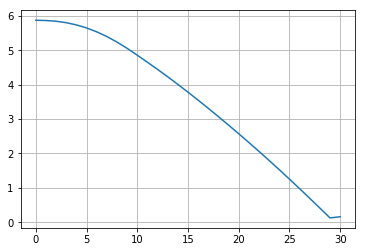

In [22]:
er=er[1:]
plt.plot(er)
plt.grid()
plt.show()

---

In [23]:
from sklearn.metrics.pairwise import pairwise_distances

In [24]:
D = pairwise_distances(Vi) # матрица расстояний
R = np.argsort(D) # номера слов в порядке увеличения расстояния

In [25]:
vocab = { i:w for i,w in enumerate(words) } # нумеруем слов в словаре

nn = np.random.permutation(len(words))[:10] # выбираем случайно N слов

# для выбранных слов печатаем близкие по w2v
{ vocab[i] : [ vocab[j] for j in  R[i,1:3]  ] for i in nn }

{'две': ['данным', 'пропадает'],
 'подходит': ['собеседнику', 'оно'],
 'одновременно': ['понимает', 'созданы'],
 'авторской': ['странице', 'обратиться'],
 'просто': ['надо', 'самое'],
 'боюсь': ['оно', 'вовсе'],
 'махнули': ['своими', 'пользовательского'],
 'авторские': ['договора', 'пользовательского'],
 'матерью': ['разводиться', 'старшая'],
 'свободной': ['предоставляет', 'конца']}